<b>Importing the required libraries</b> <br><br>
*Pandas is an open source Python package that is most widely used for data science/data analysis and machine learning tasks. It is built on top of another package named Numpy, which provides support for multi-dimensional arrays. <br>
*NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataset_1.csv')
df.head()

,Brand,Model,ROM,RAM,OS,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor,Price
0,Huawei,Y5 Prime,16.0,2.0,Android,5.5,Yes,Yes,No,Yes,5000
1,Huawei,Y5,16.0,2.0,Android,5.7,Yes,Yes,No,Yes,5000
2,Apple,iPhone 4S,16.0,1.0,iOS,3.5,No,No,No,No,5000
3,Huawei,Y5,16.0,2.0,Android,5.7,No,No,No,No,5000
4,Huawei,Y5,16.0,2.0,Android,5.7,Yes,No,No,No,5000


In [3]:
df.describe()

,ROM,RAM,Screen size,Price
count,26128.000000,40024.000000,40024.000000,40024.000000
mean,103.546846,3.399589,5.718886,52590.152159
std,81.175279,1.827624,0.740893,52133.221632
min,8.000000,0.000000,0.500000,5000.000000
25%,64.000000,2.000000,5.000000,22045.000000
50%,64.000000,3.000000,5.900000,35000.000000
75%,128.000000,4.000000,6.400000,59900.000000
max,1024.000000,12.000000,7.600000,620000.000000


There are 40023 rows of data after initial data cleaning steps. 
Also, there are 11 columns which include 10 features and the price.
We can process the data further to explore the relationships among features and to extract the important information.

<b>Handling the missing data</b> <br><br>
Filling the missing values in the ROM column.
Pandas dataframe.interpolate() function is basically used to fill NA values in the dataframe or series. 
But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value. We have used the nearest method since the rows are sorted in the ascending order. The ROM values can assume to take the value of its nearest member in the forward direction.

In [4]:
df.isnull().sum()

Brand                     0
Model                     0
ROM                   13896
RAM                       0
OS                        0
Screen size               0
Dual Sim                  0
Expandable Memory         0
5G                        0
Fingerprint Sensor        0
Price                     0
dtype: int64

In [5]:
(df.isnull().sum()/df.shape[0]*100)[df.isnull().sum()>0]

ROM    34.719168
dtype: float64

<b>Observation</b> <br><br>
ROM column containes 13896 missing values. So these have to be filled using a suitable method.

In [6]:
df = df.interpolate(method ='nearest', limit_direction ='forward')

In [7]:
df.describe()

,ROM,RAM,Screen size,Price
count,40024.000000,40024.000000,40024.000000,40024.000000
mean,99.223466,3.399589,5.718886,52590.152159
std,78.349033,1.827624,0.740893,52133.221632
min,8.000000,0.000000,0.500000,5000.000000
25%,32.000000,2.000000,5.000000,22045.000000
50%,64.000000,3.000000,5.900000,35000.000000
75%,128.000000,4.000000,6.400000,59900.000000
max,1024.000000,12.000000,7.600000,620000.000000


Earlier the ROM column contained only 26127 values. <br> After filling the missing data now it contains values for all the 40023 rows. And all the other columns seems to be fine. And let us see how the non-numeric columns appear in our dataset. 

In [8]:
df.describe(include="object")

,Brand,Model,OS,Dual Sim,Expandable Memory,5G,Fingerprint Sensor
count,40024,40024,40024,40024,40024,40024,40024
unique,17,601,5,2,2,2,2
top,Apple,iPhone 7,Android,No,No,No,Yes
freq,18751,3850,21242,23936,22507,39326,21771


<b>Exploring the dataset</b><br>
Unique values for categorical variables

In [9]:
for column in df.columns:
    if df[column].dtype == "object":
        print(column.upper(), ": ", df[column].nunique())
        print(df[column].value_counts())
        print("\n")
        print("*" * 55)
        print("\n")

BRAND :  17
Apple         18751
Samsung        8716
Huawei         3027
Xiaomi         2941
Sony           2301
Oppo           1264
Vivo            797
Nokia           639
LG              561
OnePlus         342
Realme          315
Google          147
Infinix         114
HTC              61
BlackBerry       17
Asus             17
Greentel         14
Name: Brand, dtype: int64


*******************************************************


MODEL :  601
iPhone 7              3850
iPhone 7 Plus         2883
iPhone 6S             2401
iPhone X              1352
iPhone 8               989
                      ... 
G20                      1
X500                     1
Xperia XZ2 Compact       1
6i                       1
One E9                   1
Name: Model, Length: 601, dtype: int64


*******************************************************


OS :  5
Android          21242
iOS              18751
BlackBerry OS       17
Other               11
Symbian OS           3
Name: OS, dtype: int64


*****

Information related to the dataframe is taken below. It shows the datatype of each column.<br>
Most of them are object type and others are float and integers.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40024 entries, 0 to 40023
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               40024 non-null  object 
 1   Model               40024 non-null  object 
 2   ROM                 40024 non-null  float64
 3   RAM                 40024 non-null  float64
 4   OS                  40024 non-null  object 
 5   Screen size         40024 non-null  float64
 6   Dual Sim            40024 non-null  object 
 7   Expandable Memory   40024 non-null  object 
 8   5G                  40024 non-null  object 
 9   Fingerprint Sensor  40024 non-null  object 
 10  Price               40024 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 3.4+ MB


In [11]:
df.nunique()

Brand                   17
Model                  601
ROM                      8
RAM                     15
OS                       5
Screen size             42
Dual Sim                 2
Expandable Memory        2
5G                       2
Fingerprint Sensor       2
Price                 2051
dtype: int64

<b>Observation</b> <br><br>
1. Apple iPhone 7 has the highest number of occurences in the dataset.<br>
2. Most of the mobile phones doesnt support dual sim.<br>
3. Also in the selected dataset many mobile phones doesn't suport Expandable memory and 5G networks.<br>
4. 4 major operating systems (Android, iOS, Symbian OS, Blackberry OS) are available and 5th category is named as "other", since they are less known operating systems which come for feature phones or the earlier generations of mobile phones.

A summary of the dataset is taken above. As shown there are 17 unique brands of mobile phones and 601 unique models. 
Also, 8 ROM capacities and 17 RAM capacities. We can see that there are 42 screen size variations available. 
Dual Sim, Expandable memory, 5G options and the availability of the Fingerprint sensor are boolean variables. Therefore only two values can be present for them (Yes/No). Finally the Price is given and there are 2051 different price points.

## Data Visualization

Categorical data is present in the Dual Sim, Expandable memory, 5G and Fingerprint Sensor columns. Therefore converting them to numeric values will be favourable for future work. Also the ML libraries will be able to handle only numeric values. <br><br>
"Yes" and "No" values are converted to 1's and 0's respectively. Replace method is used for them which is available in the Pandas library. This can easily replace the data with the given values. And the visualization of the data is carried out after that. 

In [12]:
df["Dual Sim"] = df["Dual Sim"].replace(["Yes","No"],[1,0])
df["Expandable Memory"] = df["Expandable Memory"].replace(["Yes","No"],[1,0])
df["5G"] = df["5G"].replace(["Yes","No"],[1,0])
df["Fingerprint Sensor"] = df["Fingerprint Sensor"].replace(["Yes","No"],[1,0])

In [13]:
df.head()

,Brand,Model,ROM,RAM,OS,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor,Price
0,Huawei,Y5 Prime,16.0,2.0,Android,5.5,1,1,0,1,5000
1,Huawei,Y5,16.0,2.0,Android,5.7,1,1,0,1,5000
2,Apple,iPhone 4S,16.0,1.0,iOS,3.5,0,0,0,0,5000
3,Huawei,Y5,16.0,2.0,Android,5.7,0,0,0,0,5000
4,Huawei,Y5,16.0,2.0,Android,5.7,1,0,0,0,5000


In [14]:
df.describe(include="object")

,Brand,Model,OS
count,40024,40024,40024
unique,17,601,5
top,Apple,iPhone 7,Android
freq,18751,3850,21242


Generating insights using plots

## Features vs Target Variable

In [15]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sum of the Prices')

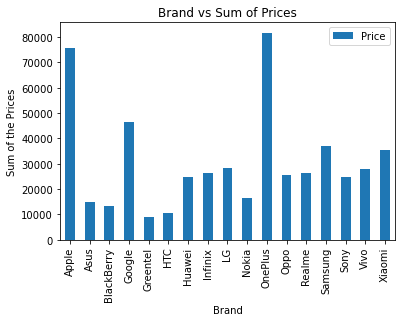

In [16]:
#calculating the mean value of the prices of each brand.
(df.groupby('Brand')['Price'].mean()).plot(kind="bar",legend = True)
plt.title('Brand vs Sum of Prices')
plt.xlabel("Brand")
plt.ylabel("Sum of the Prices")

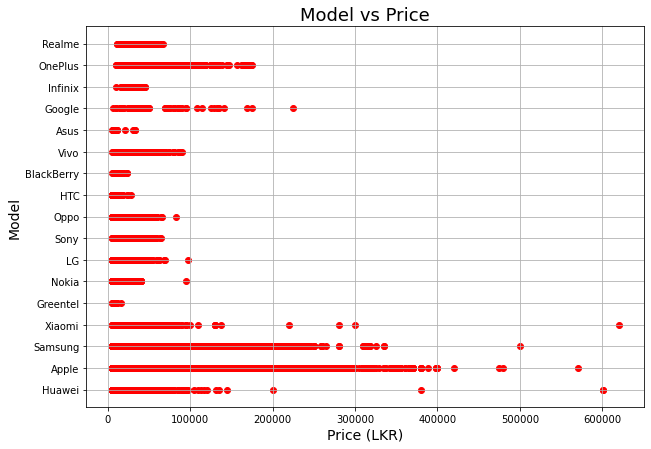

In [17]:

plt.figure(figsize=(10,7))
plt.scatter(df["Price"], df["Brand"], color="red")
plt.title("Model vs Price", fontsize = 18)
plt.xlabel("Price (LKR)", fontsize = 14)
plt.ylabel("Model", fontsize = 14)
plt.grid(True)
plt.show()


<b>Observations</b><br><br>
A wide variation of prices exist for the brands such as Samsung, Xiaomi, Apple and Huawei.<br>
The reason for this must be the existence of lot of models at different price points from these manufacturers.
Some outliers exist for Xiaomi, Samsung, Apple and Huawei and these will be handled later before training the prediction models.

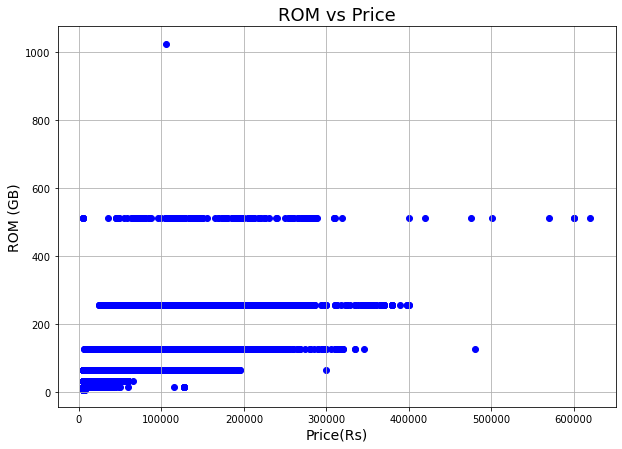

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(df["Price"], df["ROM"], color="blue")
plt.title("ROM vs Price", fontsize = 18)
plt.xlabel("Price(Rs)", fontsize = 14)
plt.ylabel("ROM (GB)", fontsize = 14)
plt.grid(True)
plt.show()

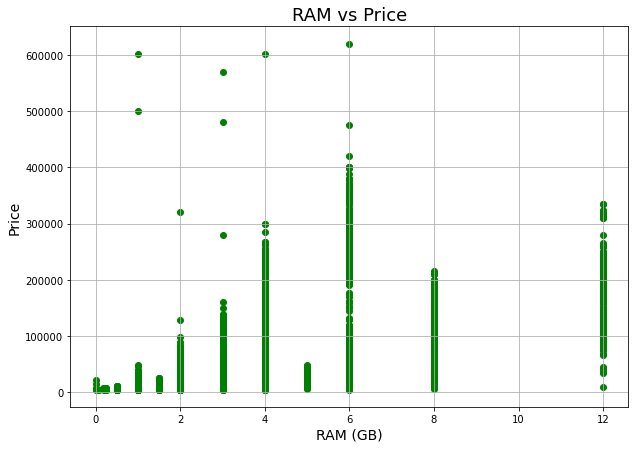

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(df["RAM"], df["Price"], color="green")
plt.title("RAM vs Price", fontsize = 18)
plt.xlabel("RAM (GB)", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.grid(True)
plt.show()

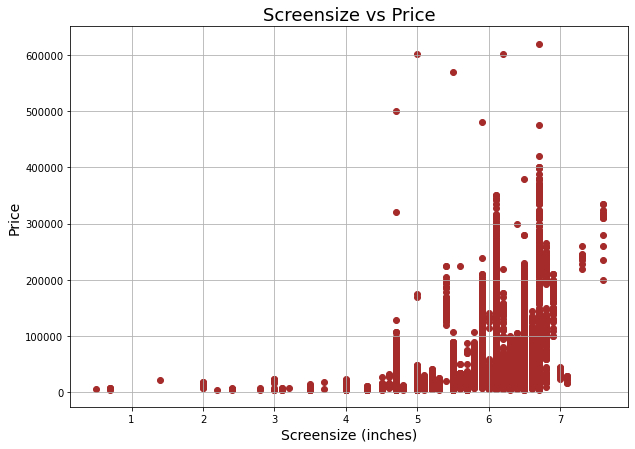

In [20]:
plt.figure(figsize=(10,7))
plt.scatter(df["Screen size"], df["Price"], color="brown")
plt.title("Screensize vs Price", fontsize = 18)
plt.xlabel("Screensize (inches)", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.grid(True)
plt.show()

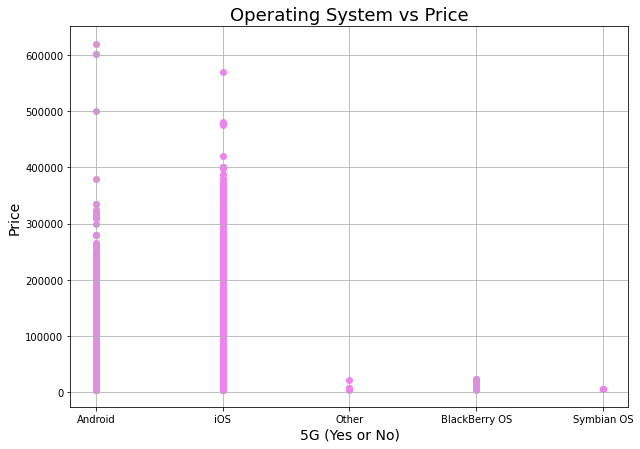

In [21]:
plt.figure(figsize=(10,7))
plt.scatter(df["OS"], df["Price"], color="violet")
plt.title("Operating System vs Price", fontsize = 18)
plt.xlabel("5G (Yes or No)", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.grid(True)
plt.show()

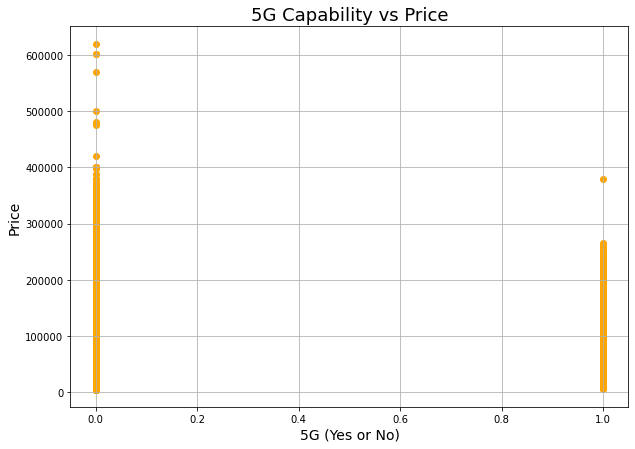

In [22]:
plt.figure(figsize=(10,7))
plt.scatter(df["5G"], df["Price"], color="orange")
plt.title("5G Capability vs Price", fontsize = 18)
plt.xlabel("5G (Yes or No)", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.grid(True)
plt.show()

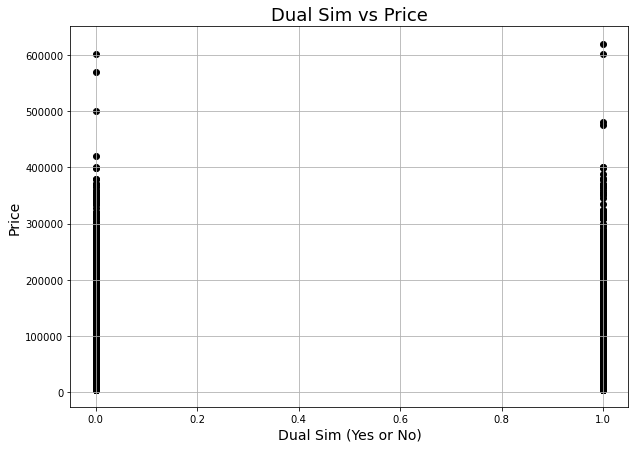

In [23]:
plt.figure(figsize=(10,7))
plt.scatter(df["Dual Sim"], df["Price"], color="black")
plt.title("Dual Sim vs Price", fontsize = 18)
plt.xlabel("Dual Sim (Yes or No)", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.grid(True)
plt.show()

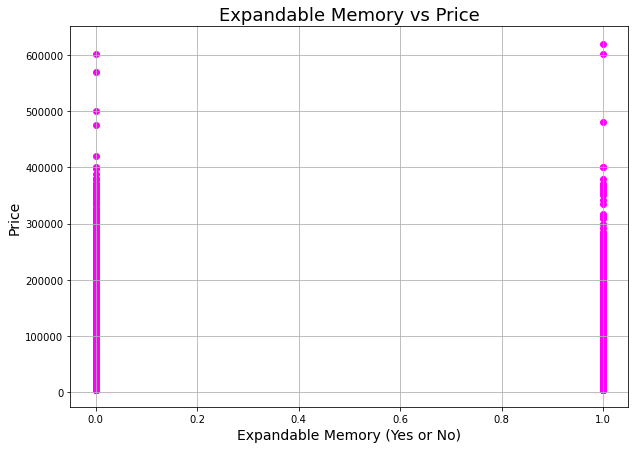

In [24]:
plt.figure(figsize=(10,7))
plt.scatter(df["Expandable Memory"], df["Price"], color="magenta")
plt.title("Expandable Memory vs Price", fontsize = 18)
plt.xlabel("Expandable Memory (Yes or No)", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.grid(True)
plt.show()

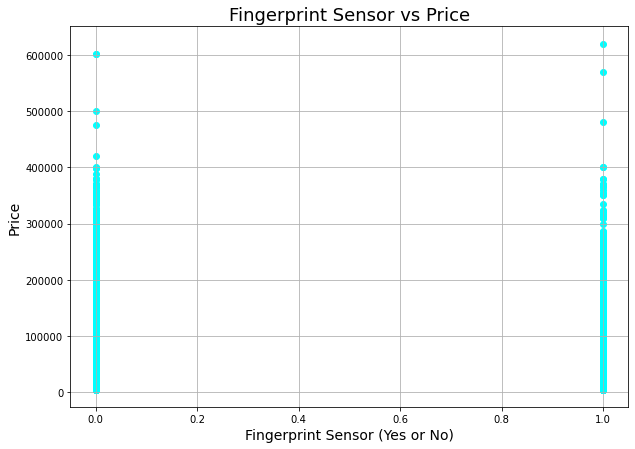

In [25]:
plt.figure(figsize=(10,7))
plt.scatter(df["Fingerprint Sensor"], df["Price"], color="cyan")
plt.title("Fingerprint Sensor vs Price", fontsize = 18)
plt.xlabel("Fingerprint Sensor (Yes or No)", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.grid(True)
plt.show()

In [26]:
import seaborn as sns

<AxesSubplot:xlabel='Price', ylabel='Brand'>

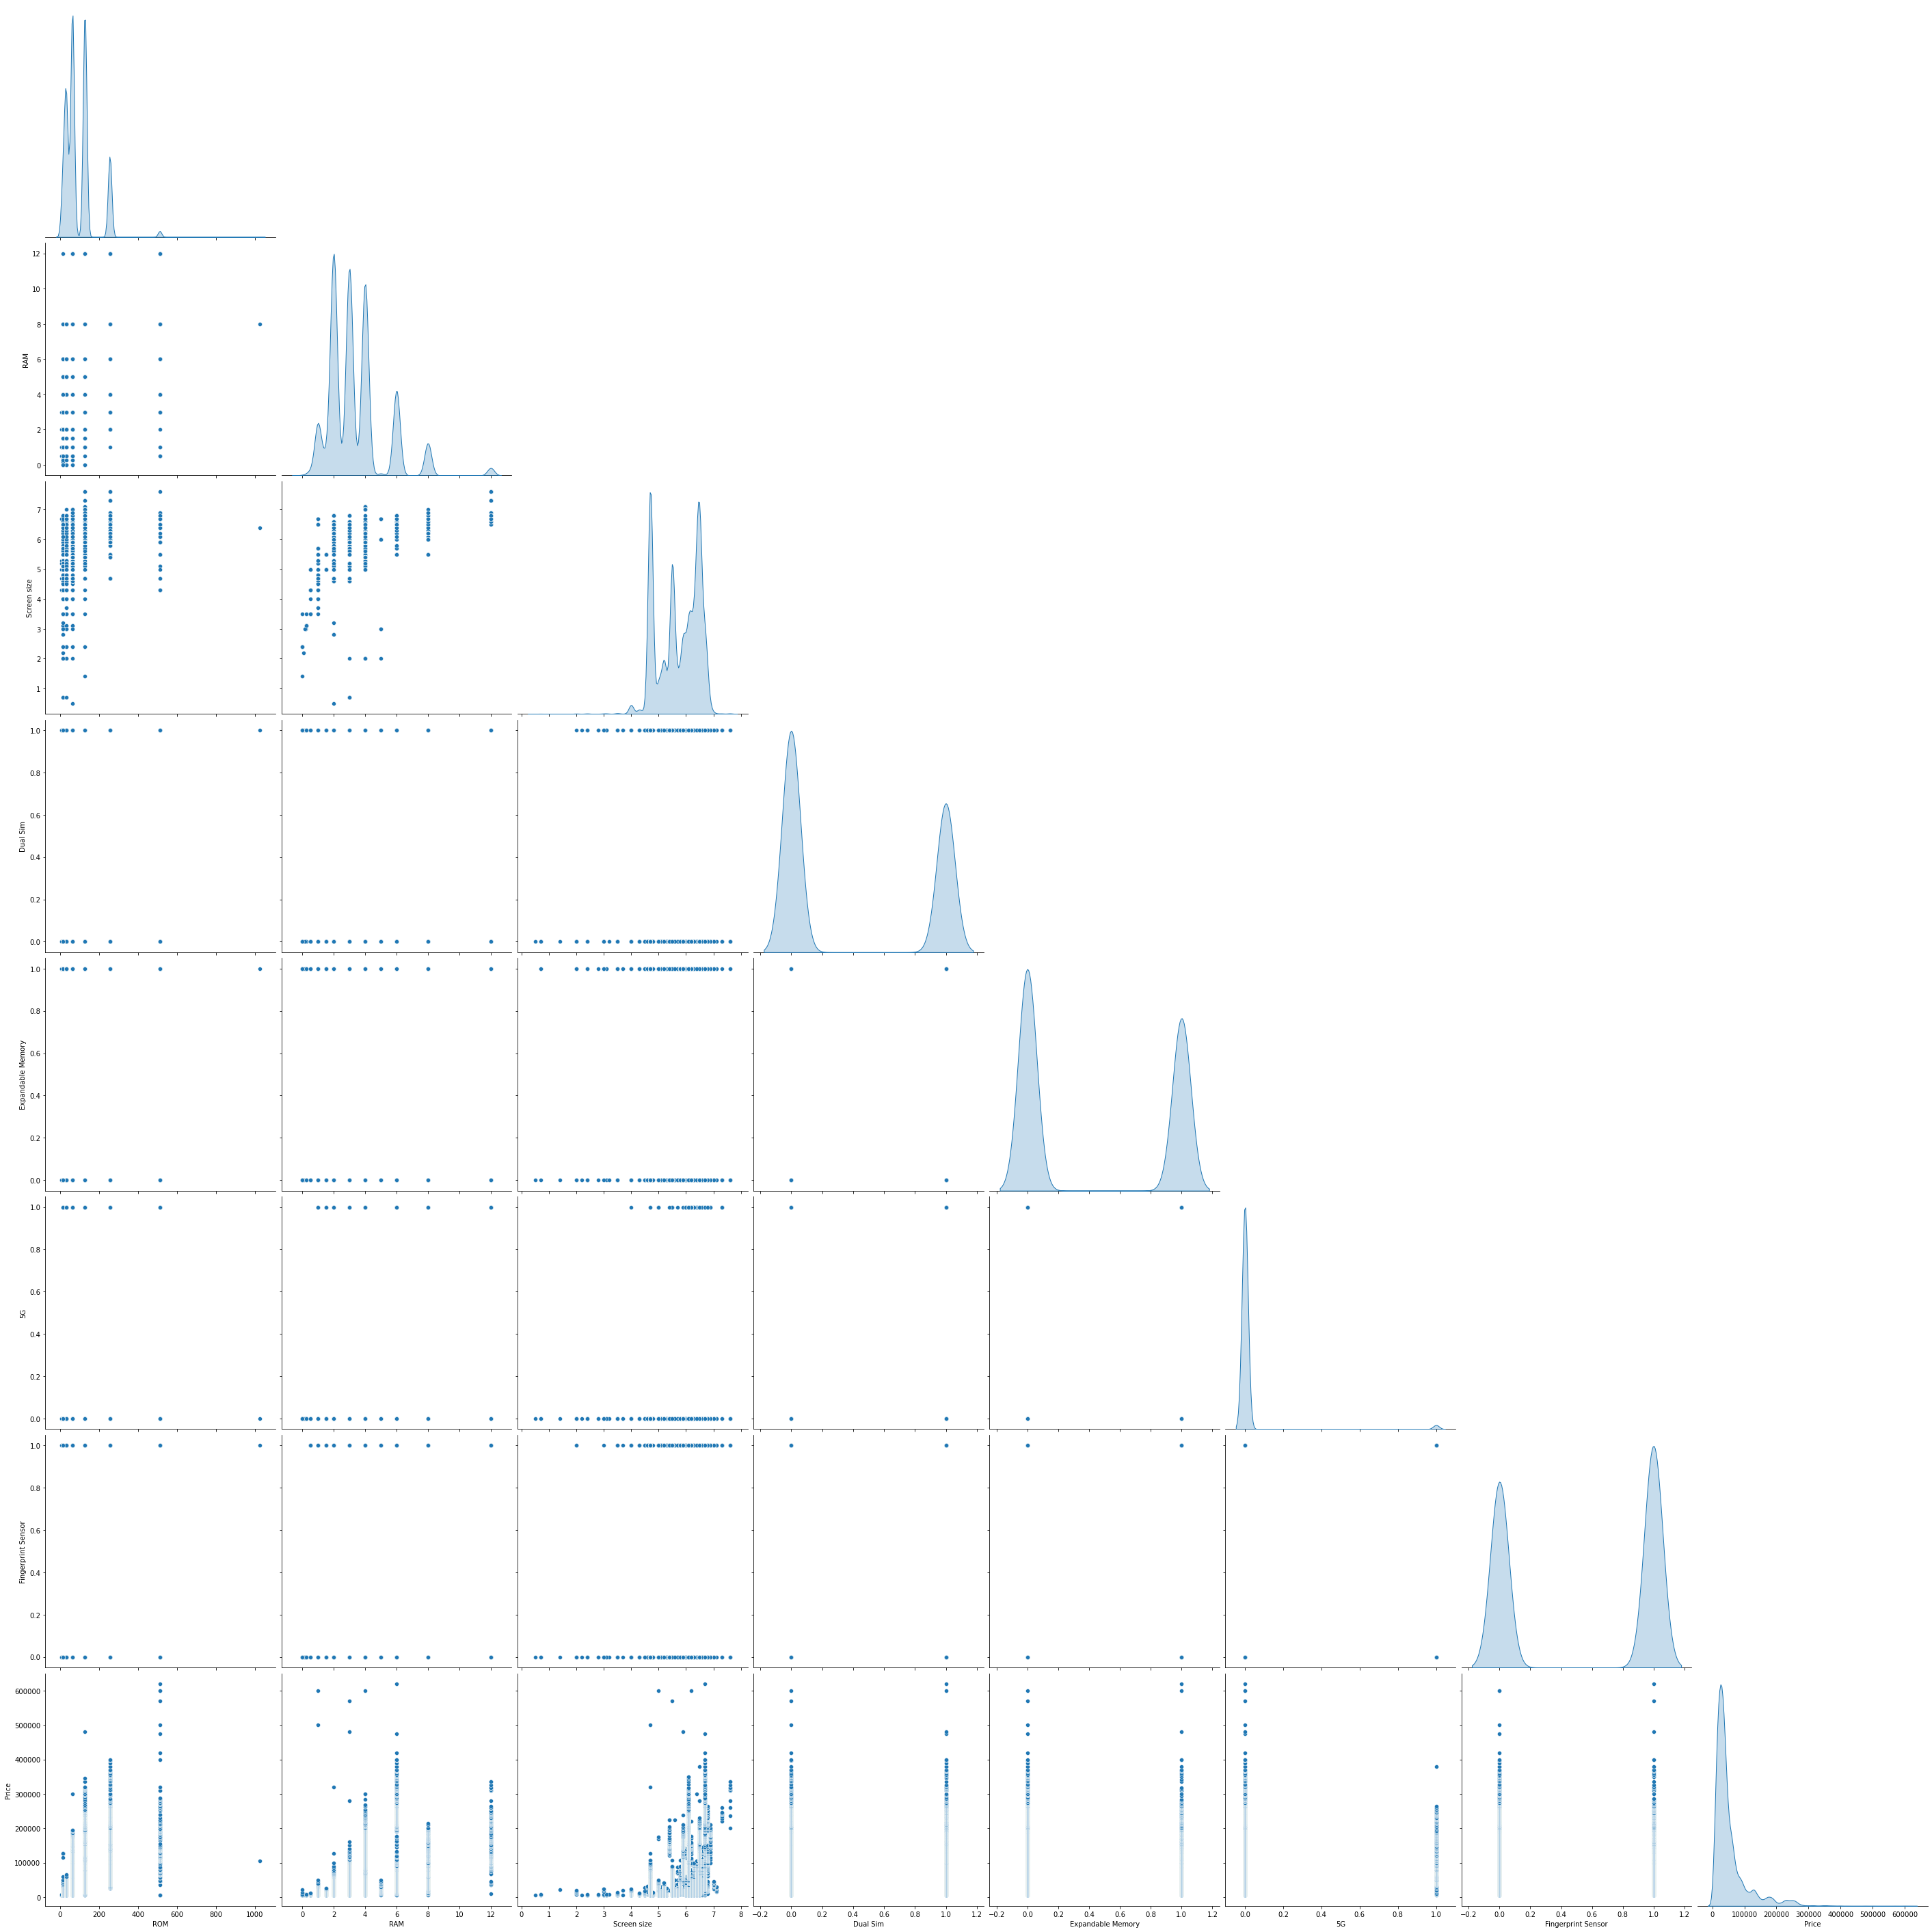

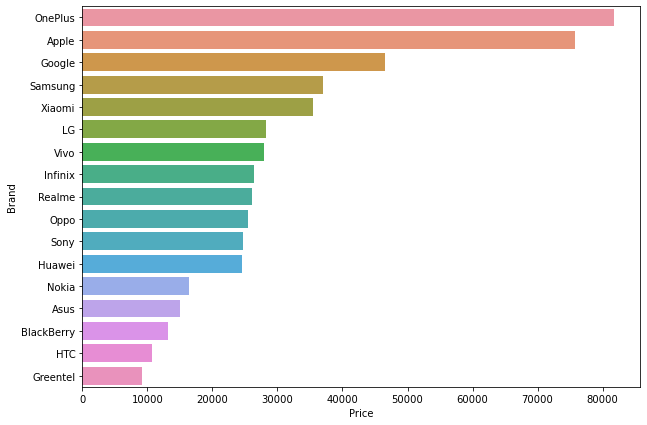

In [27]:
sns.pairplot(df, height=5, diag_kind="kde", corner=True)
plt.figure(figsize=(10,7))
sns.barplot(
    y=df["Brand"],
    x=df["Price"],    ci=False,
    order=df.groupby("Brand").mean()["Price"].sort_values(ascending=False).index,
)


<AxesSubplot:xlabel='ROM', ylabel='Price'>

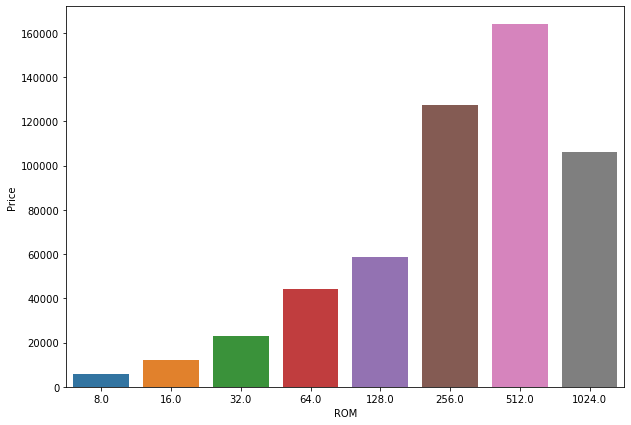

In [28]:
plt.figure(figsize=(10,7))
sns.barplot(
    x=df["ROM"],
    y=df["Price"],
    ci=False,
    order=df.groupby("ROM").mean()["Price"].index,
)


<AxesSubplot:xlabel='RAM', ylabel='Price'>

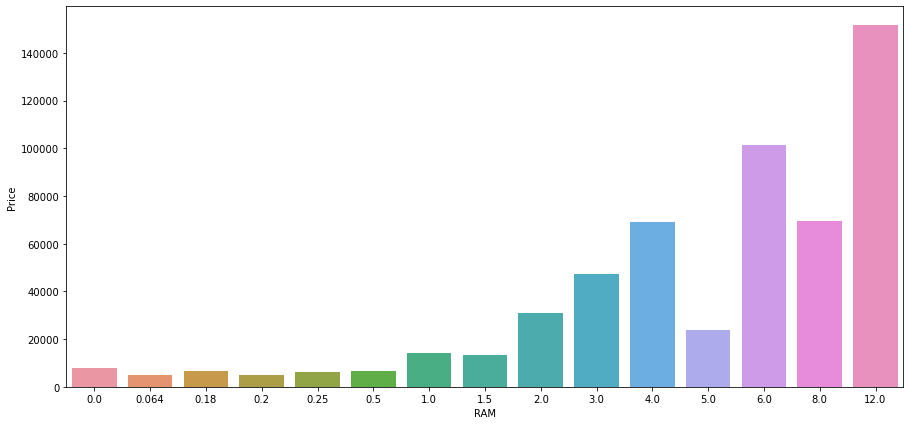

In [29]:
plt.figure(figsize=(15,7))
sns.barplot(
    x=df["RAM"],
    y=df["Price"],
    ci=False,
    order=df.groupby("RAM").mean()["Price"].index,
    linewidth=1
)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, '0.5'),
  Text(1, 0, '0.7'),
  Text(2, 0, '1.4'),
  Text(3, 0, '2.0'),
  Text(4, 0, '2.2'),
  Text(5, 0, '2.4'),
  Text(6, 0, '2.8'),
  Text(7, 0, '3.0'),
  Text(8, 0, '3.1'),
  Text(9, 0, '3.2'),
  Text(10, 0, '3.5'),
  Text(11, 0, '3.7'),
  Text(12, 0, '4.0'),
  Text(13, 0, '4.3'),
  Text(14, 0, '4.5'),
  Text(15, 0, '4.6'),
  Text(16, 0, '4.7'),
  Text(17, 0, '4.8'),
  Text(18, 0, '5.0'),
  Text(19, 0, '5.1'),
  Text(20, 0, '5.2'),
  Text(21, 0, '5.3'),
  Text(22, 0, '5.4'),
  Text(23, 0, '5.5'),
  Text(24, 0, '5.6'),
  Text(25, 0, '5.7'),
  Text(26, 0, '5.8'),
  Text(27, 0, '5.9'),
  Text(28, 0, '6.0'),
  Text(29, 0, '6.1'),
  Text(30, 0, '6.2'),
  Text(31, 0, '6.3'),
  Text(32, 0, '6.4'),
  Text(33, 0, '6.5'),
  Text(34, 0, '6.6'),
  Text(35, 0, '6.7'),
  Text(36, 0, '6.8'),
  

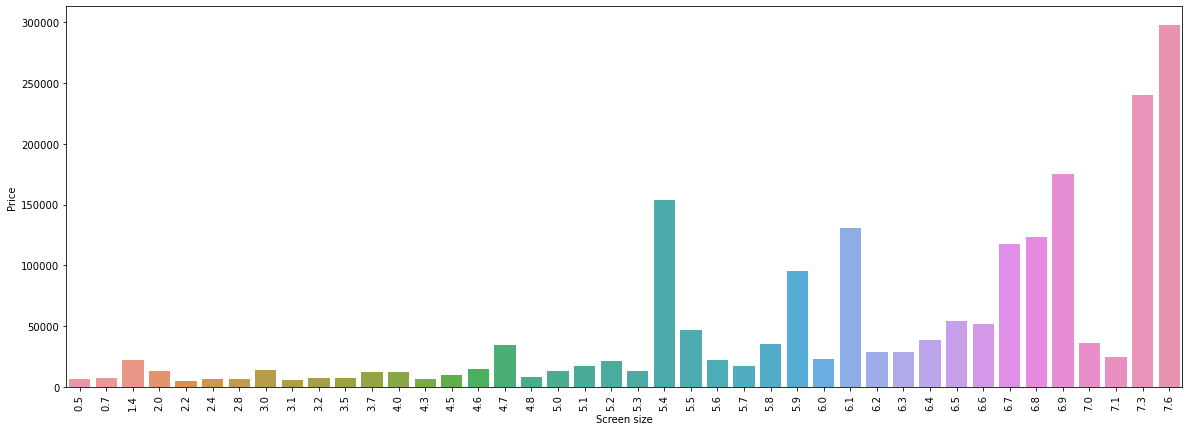

In [30]:
plt.figure(figsize=(20,7))
sns.barplot(
    x=df["Screen size"],
    y=df["Price"],
    ci=False,
    order=df.groupby("Screen size").mean()["Price"].index,
    linewidth=2
)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='OS', ylabel='Price'>

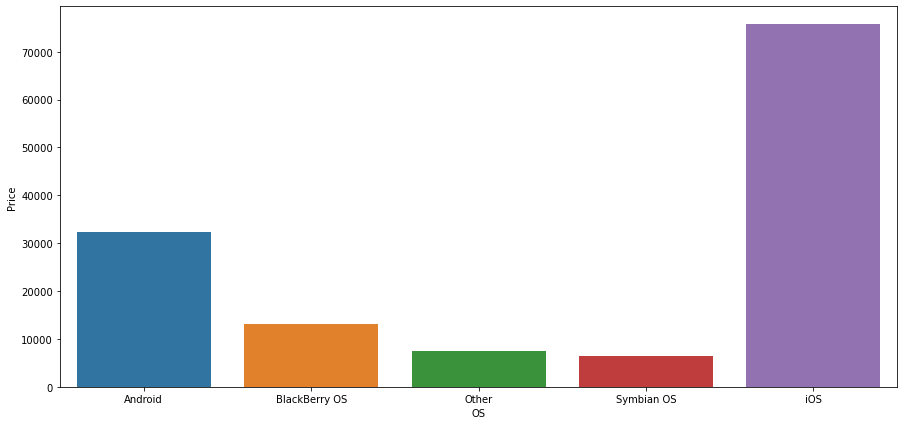

In [31]:
plt.figure(figsize=(15,7))
sns.barplot(
    x=df["OS"],
    y=df["Price"],
    ci=False,
    order=df.groupby("OS").mean()["Price"].index,
    linewidth=1
)

<AxesSubplot:xlabel='Dual Sim', ylabel='Price'>

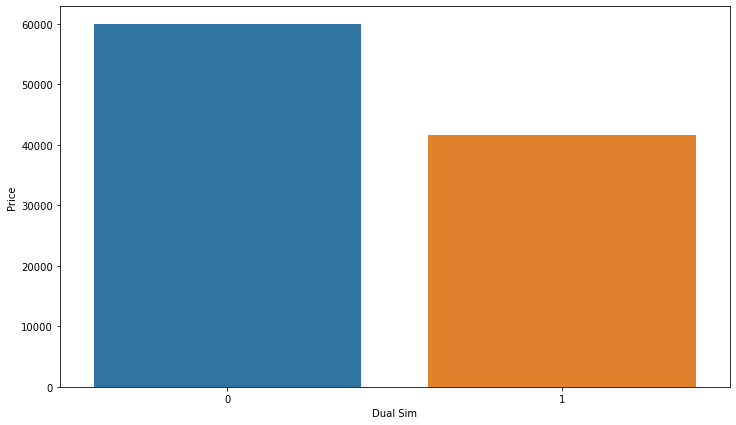

In [32]:
plt.figure(figsize=(12,7))
sns.barplot(
    x=df["Dual Sim"],
    y=df["Price"],
    ci=False,
    order=df.groupby("Dual Sim").mean()["Price"].index,
    linewidth=1
)

<AxesSubplot:xlabel='5G', ylabel='Price'>

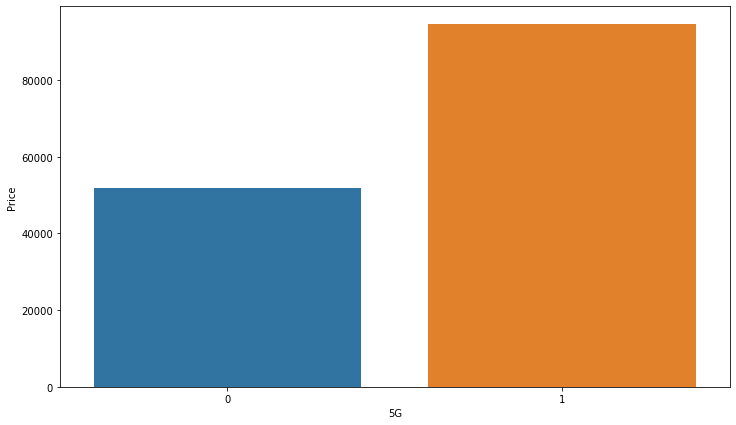

In [33]:
plt.figure(figsize=(12,7))
sns.barplot(
    x=df["5G"],
    y=df["Price"],
    ci=False,
    order=df.groupby("5G").mean()["Price"].index,
    linewidth=1
)

<AxesSubplot:xlabel='Expandable Memory', ylabel='Price'>

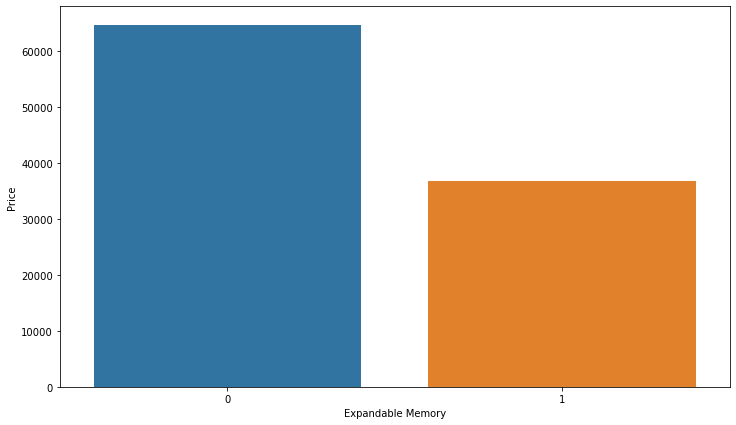

In [34]:
plt.figure(figsize=(12,7))
sns.barplot(
    x=df["Expandable Memory"],
    y=df["Price"],
    ci=False,
    order=df.groupby("Expandable Memory").mean()["Price"].index,
    linewidth=1
)

<AxesSubplot:xlabel='Fingerprint Sensor', ylabel='Price'>

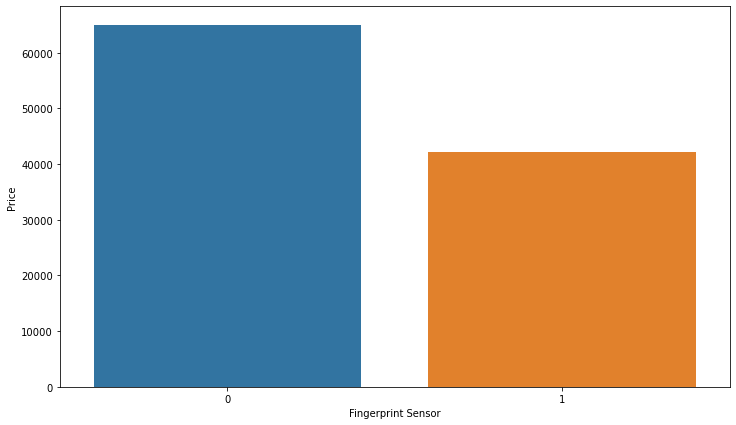

In [35]:
plt.figure(figsize=(12,7))
sns.barplot(
    x=df["Fingerprint Sensor"],
    y=df["Price"],
    ci=False,
    order=df.groupby("Fingerprint Sensor").mean()["Price"].index,
    linewidth=1
)

<AxesSubplot:xlabel='Brand'>

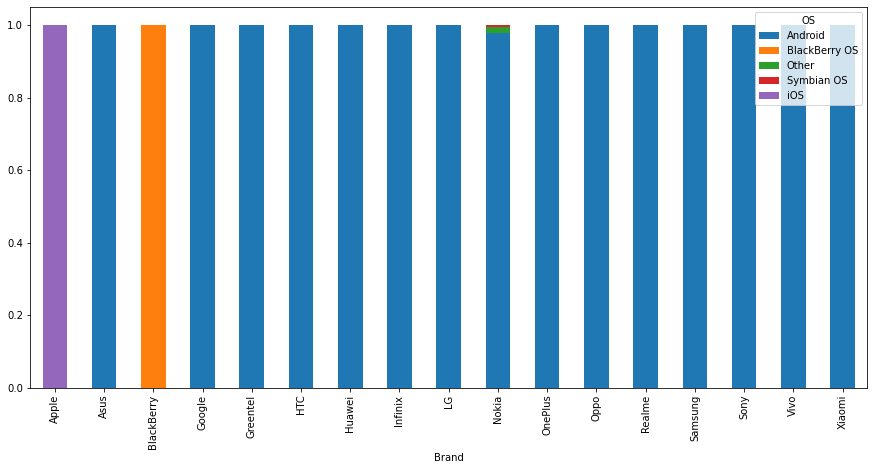

In [36]:
pd.crosstab(df["Brand"], df["OS"], normalize="index").plot(
    kind="bar", stacked=True, figsize=(15,7)
)

<AxesSubplot:xlabel='Brand'>

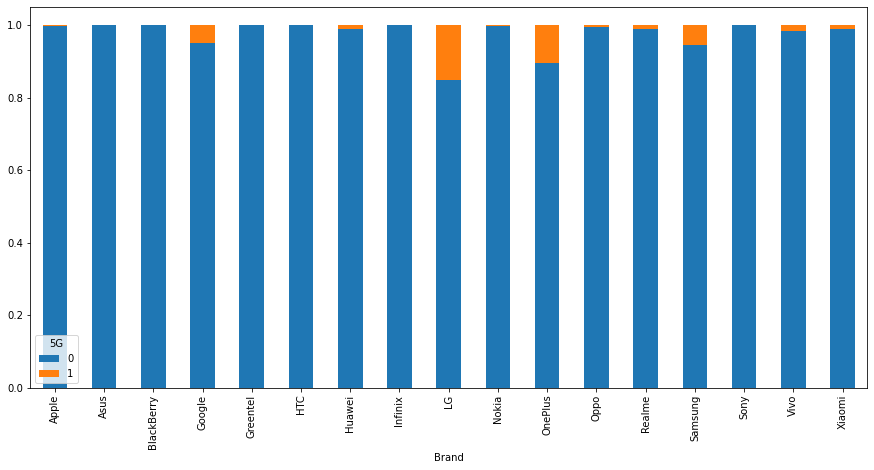

In [37]:
pd.crosstab(df["Brand"], df["5G"], normalize="index").plot(
    kind="bar", stacked=True, figsize=(15,7)
)

<AxesSubplot:xlabel='Brand'>

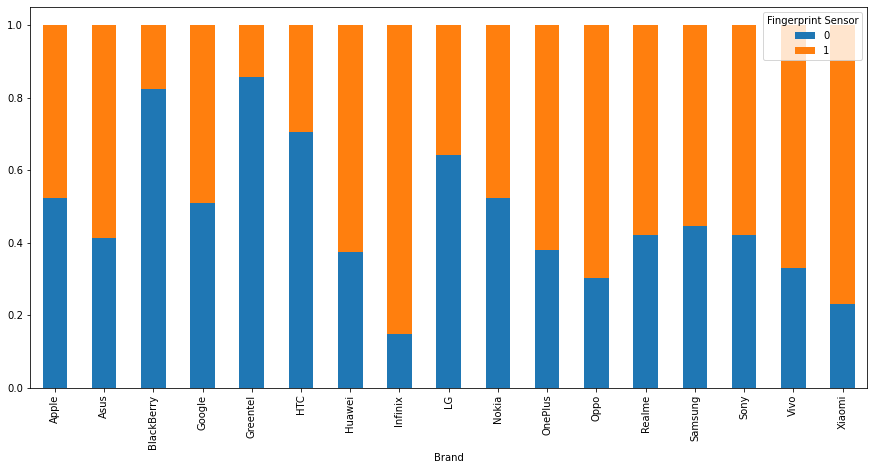

In [38]:
pd.crosstab(df["Brand"], df["Fingerprint Sensor"], normalize="index").plot(
    kind="bar", stacked=True, figsize=(15,7)
)

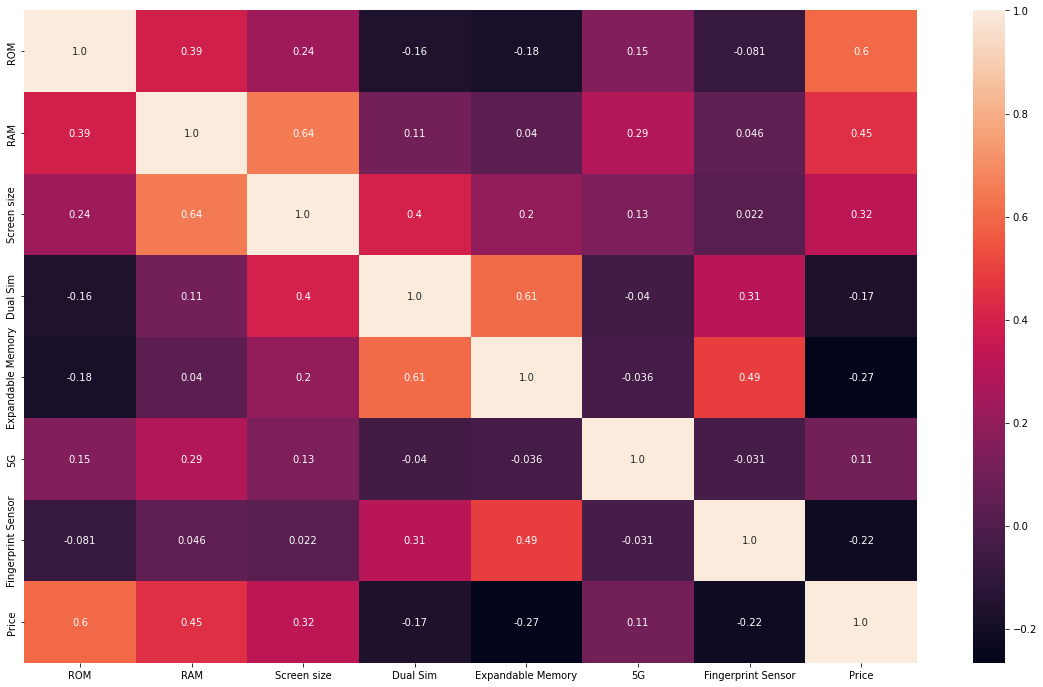

In [39]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, fmt=".2")
plt.show()

In [40]:
df.describe()

,ROM,RAM,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor,Price
count,40024.000000,40024.000000,40024.000000,40024.000000,40024.000000,40024.000000,40024.000000,40024.000000
mean,99.223466,3.399589,5.718886,0.401959,0.437662,0.017440,0.543949,52590.152159
std,78.349033,1.827624,0.740893,0.490300,0.496105,0.130904,0.498071,52133.221632
min,8.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,5000.000000
25%,32.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,22045.000000
50%,64.000000,3.000000,5.900000,0.000000,0.000000,0.000000,1.000000,35000.000000
75%,128.000000,4.000000,6.400000,1.000000,1.000000,0.000000,1.000000,59900.000000
max,1024.000000,12.000000,7.600000,1.000000,1.000000,1.000000,1.000000,620000.000000


In [41]:
df.head()

,Brand,Model,ROM,RAM,OS,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor,Price
0,Huawei,Y5 Prime,16.0,2.0,Android,5.5,1,1,0,1,5000
1,Huawei,Y5,16.0,2.0,Android,5.7,1,1,0,1,5000
2,Apple,iPhone 4S,16.0,1.0,iOS,3.5,0,0,0,0,5000
3,Huawei,Y5,16.0,2.0,Android,5.7,0,0,0,0,5000
4,Huawei,Y5,16.0,2.0,Android,5.7,1,0,0,0,5000


In [42]:
for column in df.columns:
    if df[column].dtype == "object":
        print(column.upper(), ": ", df[column].nunique())
        print(df[column].value_counts())
        print("\n")
        print("*" * 55)
        print("\n")

BRAND :  17
Apple         18751
Samsung        8716
Huawei         3027
Xiaomi         2941
Sony           2301
Oppo           1264
Vivo            797
Nokia           639
LG              561
OnePlus         342
Realme          315
Google          147
Infinix         114
HTC              61
BlackBerry       17
Asus             17
Greentel         14
Name: Brand, dtype: int64


*******************************************************


MODEL :  601
iPhone 7              3850
iPhone 7 Plus         2883
iPhone 6S             2401
iPhone X              1352
iPhone 8               989
                      ... 
G20                      1
X500                     1
Xperia XZ2 Compact       1
6i                       1
One E9                   1
Name: Model, Length: 601, dtype: int64


*******************************************************


OS :  5
Android          21242
iOS              18751
BlackBerry OS       17
Other               11
Symbian OS           3
Name: OS, dtype: int64


*****

## Distribution & Outliers

In [43]:
df.columns

Index(['Brand', 'Model', 'ROM', 'RAM', 'OS', 'Screen size', 'Dual Sim',
       'Expandable Memory', '5G', 'Fingerprint Sensor', 'Price'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

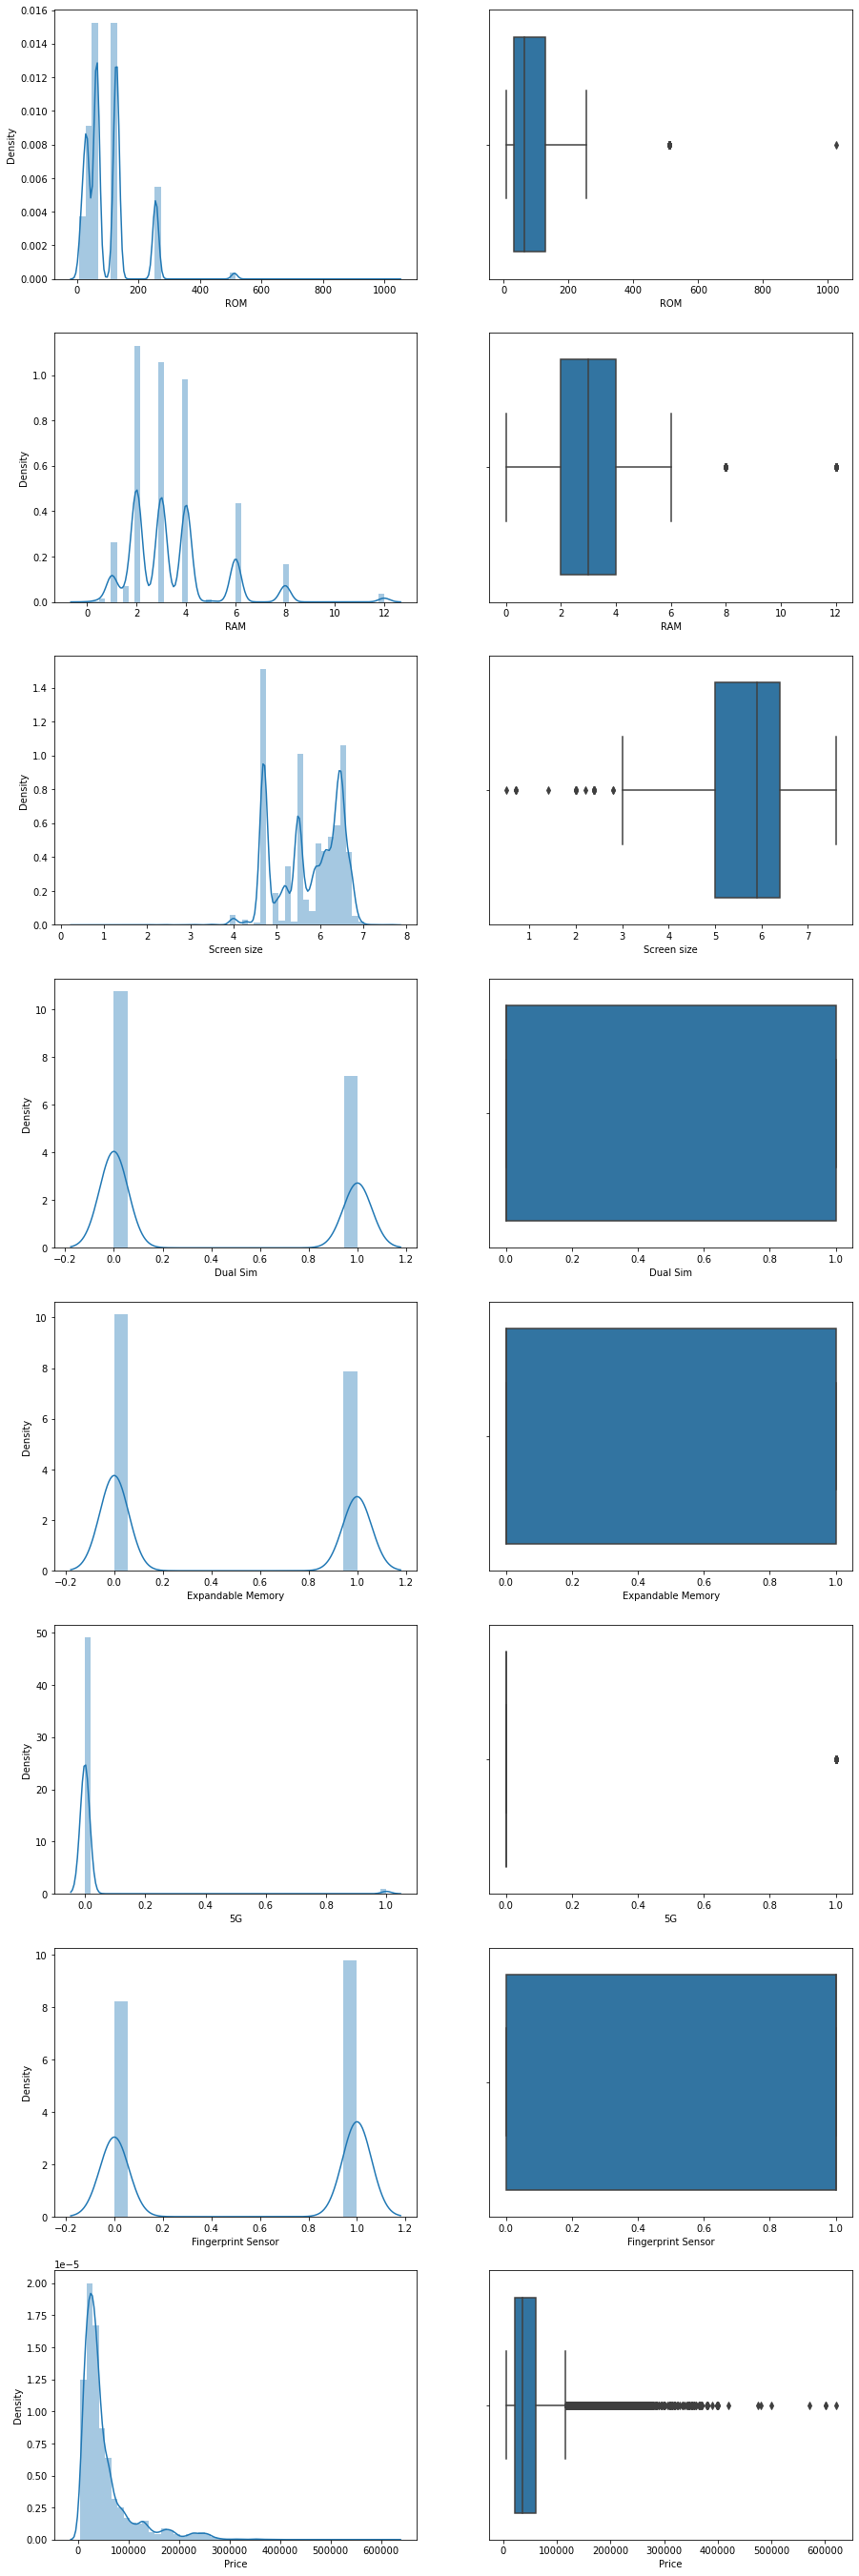

In [44]:
a=1
plt.figure(figsize=(15,80))
for i in df[
    [
      'Brand', 'Model', 'ROM', 'RAM', 'OS', 'Screen size', 'Dual Sim',
       'Expandable Memory', '5G', 'Fingerprint Sensor', 'Price',  
    ]
]:
    if df[i].dtype != "object":
        plt.subplot(13,2,a)
        sns.distplot(df[i])
        plt.subplot(13,2,a+1)
        sns.boxplot(df[i])
        a +=2

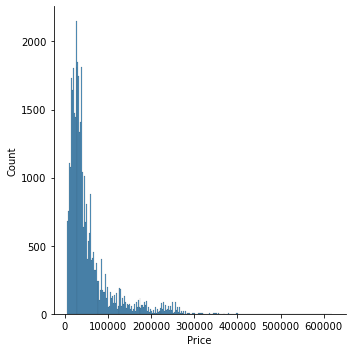

In [49]:
sns.displot(data=df, x="Price")

<Figure size 1296x504 with 0 Axes>

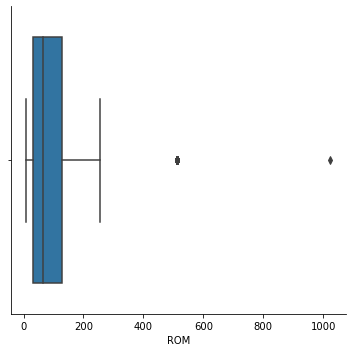

In [46]:
plt.figure(figsize=(18,7))
sns.catplot(data=df, x="ROM", kind="box")

In [ ]:
# def remove_outlier(col):
#     sorted(col)
#     q1,q3 = np.quantile(col, [0.25,0.75])
#     iqr = q3-q1
#     ll = q1-1.5*iqr
#     ul = q3+1.5*iqr
#     return ll+ul

<b>Saving the dataframe as a CSV file.</b>

In [48]:
file_name = 'MobilePhonedata_new.csv'
  
# saving the excel
df.to_csv(file_name)
print('DataFrame is written to CSV File successfully.')

DataFrame is written to CSV File successfully.
